*__We Are gonna see 4 important things in the following NoteBook:__*
__1) Trend analysis to uncover popular winter jacket styles and features.__
__2)Price analysis to identify pricing strategies and discount patterns.__
__3)Consumer preference studies through ratings and wish list counts.__
__4)Inventory management insights by analyzing available quantities.__


In [45]:
#Importing Libraries:

import numpy as np
#import tensorflow as tf 
#import pytorch as pt 

import pandas as pd 
pd.pandas.set_option('display.max_columns', None)

import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl
import seaborn as sns 

#import keras 
import sklearn
import math 

#mpl.rcParams['figure.dpi'] = 400

In [46]:
#Reading the .csv file:
df = pd.read_csv("C:\\Users\\Local User\\archive\\ali_express_2024_winter_jackets.csv")

In [47]:
#first 5 default cells/rows of the data:
df.head()

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice
0,Winter Padded Cotton Coat Female New Korean Ve...,68 sold,0.0,309,17726,18.412000,16.31,27.34
1,2024 Women Parkas Winter Casual Long Coats Jac...,14 sold,5.0,46,23969,42.540000,42.54,42.54
2,Faux Fur Woman Jacket Hooded Drawstring Parka ...,1 sold,0.0,3,599,25.445667,24.28,26.62
3,2023 New Down Cotton Vest Women Autumn Winter ...,800+ sold,4.5,1585,485033,11.981977,2.06,21.36
4,New Winter Women Parka Hooded Jackets Thicken ...,43 sold,0.0,112,32651,15.250000,15.25,15.25


In [48]:
#Basic info about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 109 non-null    object 
 1   tradeAmount           109 non-null    object 
 2   averageStar           109 non-null    float64
 3   wishedCount           109 non-null    int64  
 4   quantity              109 non-null    int64  
 5   AverageDiscountPrice  109 non-null    float64
 6   MinDiscountPrice      109 non-null    float64
 7   MaxDiscountPrice      109 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.9+ KB


In [49]:
#Basic Stats of the data:
df.describe()

,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,2.221101,639.192661,19232.614679,28.701923,27.610093,29.511589
std,2.292745,1553.704417,63272.820080,28.672899,29.039698,28.414972
min,0.000000,0.000000,6.000000,3.971250,2.060000,4.250000
25%,0.000000,2.000000,399.000000,12.826667,12.110000,14.500000
50%,1.000000,28.000000,2048.000000,22.767778,21.150000,23.120000
75%,4.600000,372.000000,15537.000000,32.580000,30.460000,33.400000
max,5.000000,9886.000000,485033.000000,203.900000,203.900000,203.900000


In [50]:
#Exploring wether there are any missing values:
df.isnull().sum()

title                   0
tradeAmount             0
averageStar             0
wishedCount             0
quantity                0
AverageDiscountPrice    0
MinDiscountPrice        0
MaxDiscountPrice        0
dtype: int64

In [51]:
#Unique values in the feature named "AverageDiscountPrice":
df['AverageDiscountPrice'].unique()

array([ 18.412     ,  42.54      ,  25.44566667,  11.98197674,
        15.25      ,  48.13      ,  23.704     ,  19.21      ,
        11.6695    ,  76.21      ,  25.037     ,  25.95444444,
        26.94833333,  16.76166667,  24.27      ,   9.05583333,
        22.92      ,  15.67875   ,  12.11      ,  45.12      ,
        20.48666667,   6.57888889,  28.70192303,  22.53      ,
        16.92      ,  16.13189873,  29.1       ,  39.33      ,
        92.94      ,  27.95      ,  33.695     ,  22.74      ,
        17.4704    ,  14.21875   ,  37.51      ,  29.87      ,
        30.3225    ,  23.19      ,  22.401875  ,  22.76777778,
        31.72      ,  91.74      ,  23.06      ,  23.03875   ,
        23.68866667,  32.12257143,  31.36      ,  22.76392857,
        27.36      ,  12.82666667,  15.62666667,  15.4825    ,
        21.99      ,   5.0644    , 118.2       ,  15.99      ,
         6.8465    ,   9.57      ,  35.65      ,   8.22533333,
       165.06      ,   4.78377778,  36.42      ,   3.97

In [52]:
df['MaxDiscountPrice'].unique()

array([ 27.34      ,  42.54      ,  26.62      ,  21.36      ,
        15.25      ,  48.13      ,  28.91      ,  19.21      ,
        14.32      ,  76.21      ,  29.55      ,  26.38      ,
        26.99      ,  16.81      ,  24.27      ,  11.58      ,
        23.        ,  15.71      ,  12.11      ,  45.12      ,
        20.78      ,   7.89      ,  29.51158879,  22.53      ,
        17.32      ,  26.22      ,  29.1       ,  39.33      ,
        92.94      ,  27.95      ,  34.01      ,  22.74      ,
        17.56      ,  14.5       ,  37.51      ,  29.97      ,
        30.43      ,  23.19      ,  22.48      ,  23.01      ,
        31.72      ,  91.74      ,  23.06      ,  23.17      ,
        23.91      ,  32.28      ,  32.59      ,  26.55      ,
        27.36      ,  13.04      ,  16.28      ,  15.84      ,
        22.06      ,   6.1       , 118.2       ,  15.99      ,
         8.69      ,   9.57      ,  35.65      ,  17.29      ,
       165.06      ,   6.57      ,  36.42      ,   5.13

In [53]:
df['MinDiscountPrice'].unique()

array([ 16.31      ,  42.54      ,  24.28      ,   2.06      ,
        15.25      ,  48.13      ,  20.64      ,  19.21      ,
         8.61      ,  76.21      ,  22.44      ,  25.81      ,
        25.99      ,  15.07      ,  24.27      ,   7.73      ,
        21.        ,  14.71      ,  12.11      ,  45.12      ,
        18.58      ,   4.31      ,  27.61009346,  22.53      ,
        16.51      ,   9.51      ,  29.1       ,  39.33      ,
        92.94      ,  27.95      ,  30.86      ,  22.74      ,
        15.32      ,  10.        ,  37.51      ,  26.97      ,
        28.28      ,  23.19      ,  21.23      ,  20.83      ,
        31.72      ,  91.74      ,  23.06      ,  21.07      ,
        20.59      ,  26.77      ,  30.42      ,  21.15      ,
        27.36      ,  12.7       ,  14.32      ,  15.24      ,
        19.96      ,   4.21      , 118.2       ,  15.99      ,
         6.12      ,   9.57      ,  35.65      ,   7.31      ,
       165.06      ,   3.8       ,  36.42      ,   2.75

In [54]:
df['averageStar'].unique()

array([0. , 5. , 4.5, 4.7, 4.4, 4. , 4.9, 3.9, 4.8, 4.3, 3. , 4.1, 1. ,
       2. , 4.6, 3.7])

In [55]:
df['title'].unique()

array(["Winter Padded Cotton Coat Female New Korean Version Loose Long Knee Length Women's Windproof Warm Down Jacket Outerwear",
       '2024 Women Parkas Winter Casual Long Coats Jackets Hooded Fur Collar Cotton Zipper Thicken Outwear Parkas Warm Coat Outwear',
       'Faux Fur Woman Jacket Hooded Drawstring Parka Coat Zipper Front Pocket Warm Thick Snow Wear Thermal Overcoat Female Outwear',
       '2023 New Down Cotton Vest Women Autumn Winter Short Loose Casual Waistcoat Womens Fashion Large Size Sleeveless Jacket Top',
       'New Winter Women Parka Hooded Jackets Thicken Warm Cotton-padded Puffer Coats Casual Long Parkas Clothes Loose Outerwear',
       'Down Jacket Men White Duck Winter Coat Windproof Warm Parkas Travel Camping Overcoat New in Thicken Solid Color Hooded Clothing',
       'Winter Clothes Women Heavy Jackets Coat Women Vintage Clothes Suit College Style Medium Length 2023 New Model',
       'Thick Down Cotton-Padded Jacket Jackets Women Overcoat Winter 2024 New K

In [56]:
df['quantity'].unique()

array([ 17726,  23969,    599, 485033,  32651,  16345,     48,   9000,
        32890,      6,    747,     89,    704,   3382,   2048,   1335,
         5000,  15958,   2899,  27903,   7500,   4513,  15984,   2904,
           28, 389680,   1188,    399,  15790,   4948,  71918,   2489,
       209195,    396,  14568,   7962,    487,   3004,    327,   2995,
          495,    784,  15933,   5979,   5596,    129,     97,   2092,
           65,   2994,     29,  29957,    535,   3000,    600,    506,
        18395,    796,    708,    400,   1480,   1592,     64,  19972,
        80838,     40,    332,     72,    177,  47999,   3192,  80919,
         1000,     20,   3566,    240,  19210,     10,     30,  27542,
         4188,  41999,   5400,  35293,    229,     39,   1214,    195,
          536,  27089,   5994,   1200,   2992,  63788,   2947,      9,
           57,  15537,   1499,    343,  67583,     12,    419],
      dtype=int64)

In [57]:
df['tradeAmount'].unique()

array(['68 sold', '14 sold', '1 sold', '800+ sold', '43 sold',
       '500+ sold', '0 sold', '1,000+ sold', '4 sold', '6 sold',
       '52 sold', '47 sold', '900+ sold', '10 sold', '105 sold',
       '95 sold', '5,000+ sold', '85 sold', '7 sold', '15 sold',
       '107 sold', '171 sold', '11 sold', '20 sold', '12 sold',
       '188 sold', '390 sold', '18 sold', '9 sold', '117 sold', '5 sold',
       '16 sold', '2 sold', '64 sold', '215 sold', '700+ sold',
       '184 sold', '13 sold', '3 sold', '34 sold', '79 sold', '399 sold',
       '600+ sold', '17 sold', '115 sold', '141 sold', '50 sold',
       '24 sold', '2,000+ sold', '3,000+ sold'], dtype=object)

In [58]:
df['wishedCount'].unique()

array([ 309,   46,    3, 1585,  112, 2883, 1793, 5863,    7, 2409,   55,
         36,  745,    2, 1214,   19,  150,  372, 9886,  500,   22, 1573,
         88,  338,   27,  819, 1572,   28,   31, 3743,  240,  833,  158,
         62,  411,   23,   16,   26,  225,   18,    9,  621, 1780, 1523,
       4690,   21, 1241,   67,    1,    0,   38,   65,   14,  127,    4,
       2416,  178,    5,  744,  227,  694,   37, 6255,  117,    8,  469,
        196,   72, 2797, 6809], dtype=int64)

In [59]:
#Value counts of all the feature in the dataset:
df[['title', 'tradeAmount', 'averageStar', 'wishedCount', 'quantity', 'AverageDiscountPrice', 'MinDiscountPrice', 'MaxDiscountPrice']].value_counts()

title                                                                                                                             tradeAmount  averageStar  wishedCount  quantity  AverageDiscountPrice  MinDiscountPrice  MaxDiscountPrice
2022 Mans Clothes Cargo Jackets Men Winter New Waterproof  Parkas Thick Warm Casual Big Pocket Hooded Jacket Women Heavy Coats    107 sold     4.1          338          6         39.330000             39.33             39.33               1
New Winter Warm Fleece Jacket Hooded Multiple Pockets Red Coat Casual Polar Jacket Cold-Proof Thick Overcoat Plus Size Outwear    2 sold       0.0          9            5596      32.122571             26.77             32.28               1
TRAF Women Fashion Patchwork Cropped Thick Warm Padded Jacket Coat Vintage Long Sleeve Front Zipper Female Outerwear Chic Tops    184 sold     4.5          1241         29        15.482500             15.24             15.84               1
TB Winter Men's Jacket Bread Down Jacket 

In [60]:
df['title'].nunique()

106

In [61]:
#As we can see that there are string and operators in the feature "tradeAmount" so we need to clear that:
def extract_integers(text):
    return ''.join(c for c in text if c.isdigit())
extract_feature = "tradeAmount"
df[extract_feature] = df[extract_feature].apply(extract_integers)
df

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice
0,Winter Padded Cotton Coat Female New Korean Ve...,68,0.0,309,17726,18.412000,16.31,27.34
1,2024 Women Parkas Winter Casual Long Coats Jac...,14,5.0,46,23969,42.540000,42.54,42.54
2,Faux Fur Woman Jacket Hooded Drawstring Parka ...,1,0.0,3,599,25.445667,24.28,26.62
3,2023 New Down Cotton Vest Women Autumn Winter ...,800,4.5,1585,485033,11.981977,2.06,21.36
4,New Winter Women Parka Hooded Jackets Thicken ...,43,0.0,112,32651,15.250000,15.25,15.25
...,...,...,...,...,...,...,...,...
104,Free Shipping MIYAKE Winter new down jacket wo...,2,0.0,7,1499,203.900000,203.90,203.90
105,2024 Y2K Streetwear Pink Hoodie Sweatshirt Fun...,24,5.0,72,343,7.229000,6.62,7.89
106,Men's Autumn Windbreaker Man Oversize Windshie...,2000,4.7,2797,67583,9.200286,8.72,9.57
107,Men 2024 Wool Blend Coat Autumn Winter Solid ...,0,0.0,0,12,41.286667,39.49,42.77


In [62]:
#If theres any missing values in the dataset it will return the mean of the missing value each feature: 
feature_with_na = [features for features in df.columns if df[features].isnull().sum() > 1]
for feature in feature_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 2 ), '% missing values') 

In [63]:
#Here we are checking for repeated values in the dataset:
value_counts = df['title'].value_counts()
repeated_values = value_counts[value_counts > 1].index.tolist()
repeated_values

['2024 Early Autumn New 90% Down Down Sleeveless for Woman Zipper Vest Short Coat New European Fashionable Light Down Vest',
 '2024 Autumn New Contrast Color Light Rhombus V-neck Down\xa0jacket Women Warm Outerwear Asian Fashionable Female Coat']

In [64]:

#As we can see that there are two repeated values so lets drop them:
if repeated_values:
    print(f"Dropping repeated values: {repeated_values} from feature '{'title'}'")
    df = df.drop(df[df['title'].isin(repeated_values)].index)
else:
    print(f"No repeated values found in '{'title'}'")


Dropping repeated values: ['2024 Early Autumn New 90% Down Down Sleeveless for Woman Zipper Vest Short Coat New European Fashionable Light Down Vest', '2024 Autumn New Contrast Color Light Rhombus V-neck Down\xa0jacket Women Warm Outerwear Asian Fashionable Female Coat'] from feature 'title'


In [65]:
df

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice
0,Winter Padded Cotton Coat Female New Korean Ve...,68,0.0,309,17726,18.412000,16.31,27.34
1,2024 Women Parkas Winter Casual Long Coats Jac...,14,5.0,46,23969,42.540000,42.54,42.54
2,Faux Fur Woman Jacket Hooded Drawstring Parka ...,1,0.0,3,599,25.445667,24.28,26.62
3,2023 New Down Cotton Vest Women Autumn Winter ...,800,4.5,1585,485033,11.981977,2.06,21.36
4,New Winter Women Parka Hooded Jackets Thicken ...,43,0.0,112,32651,15.250000,15.25,15.25
...,...,...,...,...,...,...,...,...
104,Free Shipping MIYAKE Winter new down jacket wo...,2,0.0,7,1499,203.900000,203.90,203.90
105,2024 Y2K Streetwear Pink Hoodie Sweatshirt Fun...,24,5.0,72,343,7.229000,6.62,7.89
106,Men's Autumn Windbreaker Man Oversize Windshie...,2000,4.7,2797,67583,9.200286,8.72,9.57
107,Men 2024 Wool Blend Coat Autumn Winter Solid ...,0,0.0,0,12,41.286667,39.49,42.77


In [66]:
df1 = pd.read_csv("C:\\Users\\Local User\\archive\\ali_express_2024_winter_jackets.csv")

In [67]:
df1

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice
0,Winter Padded Cotton Coat Female New Korean Ve...,68 sold,0.0,309,17726,18.412000,16.31,27.34
1,2024 Women Parkas Winter Casual Long Coats Jac...,14 sold,5.0,46,23969,42.540000,42.54,42.54
2,Faux Fur Woman Jacket Hooded Drawstring Parka ...,1 sold,0.0,3,599,25.445667,24.28,26.62
3,2023 New Down Cotton Vest Women Autumn Winter ...,800+ sold,4.5,1585,485033,11.981977,2.06,21.36
4,New Winter Women Parka Hooded Jackets Thicken ...,43 sold,0.0,112,32651,15.250000,15.25,15.25
...,...,...,...,...,...,...,...,...
104,Free Shipping MIYAKE Winter new down jacket wo...,2 sold,0.0,7,1499,203.900000,203.90,203.90
105,2024 Y2K Streetwear Pink Hoodie Sweatshirt Fun...,24 sold,5.0,72,343,7.229000,6.62,7.89
106,Men's Autumn Windbreaker Man Oversize Windshie...,"2,000+ sold",4.7,2797,67583,9.200286,8.72,9.57
107,Men 2024 Wool Blend Coat Autumn Winter Solid ...,0 sold,0.0,0,12,41.286667,39.49,42.77


In [68]:
#Droping the duplicate values of the feature "title":
df1_without_duplicates = df1.drop_duplicates(subset = 'title')
df1_without_duplicates

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice
0,Winter Padded Cotton Coat Female New Korean Ve...,68 sold,0.0,309,17726,18.412000,16.31,27.34
1,2024 Women Parkas Winter Casual Long Coats Jac...,14 sold,5.0,46,23969,42.540000,42.54,42.54
2,Faux Fur Woman Jacket Hooded Drawstring Parka ...,1 sold,0.0,3,599,25.445667,24.28,26.62
3,2023 New Down Cotton Vest Women Autumn Winter ...,800+ sold,4.5,1585,485033,11.981977,2.06,21.36
4,New Winter Women Parka Hooded Jackets Thicken ...,43 sold,0.0,112,32651,15.250000,15.25,15.25
...,...,...,...,...,...,...,...,...
104,Free Shipping MIYAKE Winter new down jacket wo...,2 sold,0.0,7,1499,203.900000,203.90,203.90
105,2024 Y2K Streetwear Pink Hoodie Sweatshirt Fun...,24 sold,5.0,72,343,7.229000,6.62,7.89
106,Men's Autumn Windbreaker Man Oversize Windshie...,"2,000+ sold",4.7,2797,67583,9.200286,8.72,9.57
107,Men 2024 Wool Blend Coat Autumn Winter Solid ...,0 sold,0.0,0,12,41.286667,39.49,42.77


In [69]:
#Checking the shape of the dataset:
df1.shape

(109, 8)

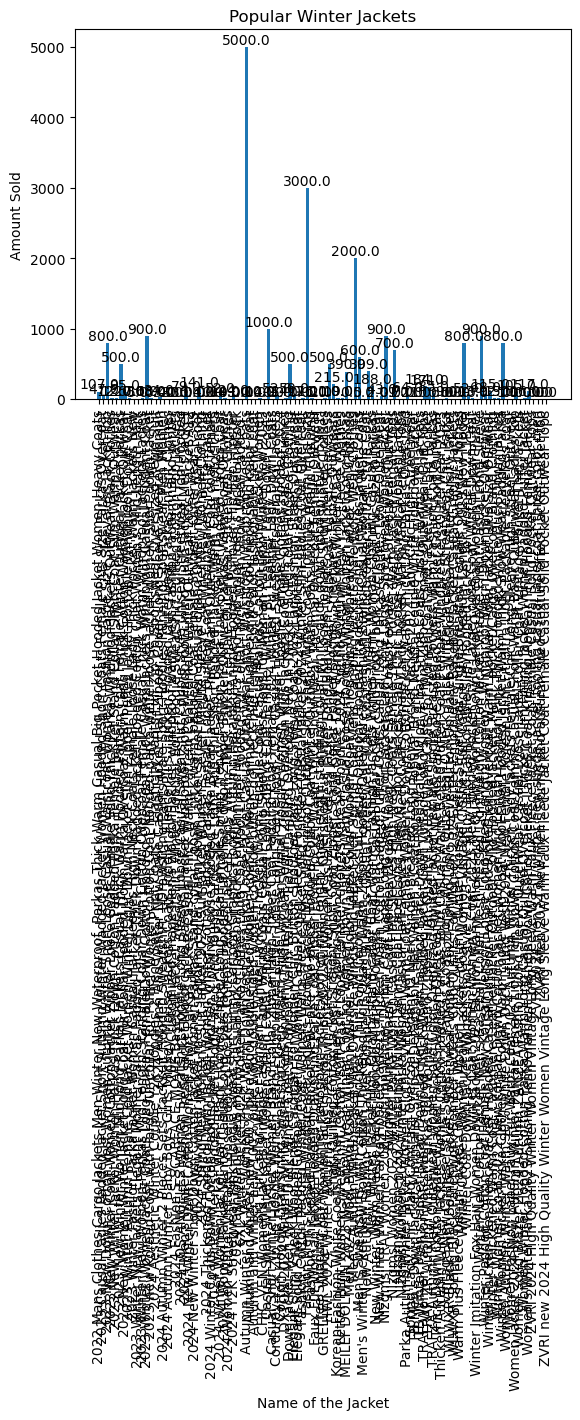

In [70]:
#Ploting the graph of title against tradeAmount 

import matplotlib.pyplot as plt

# Calculate median trade amount for each title
median_trade_amount = df.groupby('title')['tradeAmount'].median()

# Create a bar plot
plt.bar(median_trade_amount.index, median_trade_amount)
plt.title('Popular Winter Jackets')
plt.xlabel('Name of the Jacket')
plt.ylabel('Amount Sold')
plt.xticks(rotation=90)

# Annotate the bars with the median trade amount values
for i, v in enumerate(median_trade_amount):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


In [71]:
#As we can see that the name of the variables are so huge and complex so we need to do somthing about it. So lets create a new feature in our datset: 
df['new_title'] = 'none'
df.head(5)

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice,new_title
0,Winter Padded Cotton Coat Female New Korean Ve...,68,0.0,309,17726,18.412000,16.31,27.34,none
1,2024 Women Parkas Winter Casual Long Coats Jac...,14,5.0,46,23969,42.540000,42.54,42.54,none
2,Faux Fur Woman Jacket Hooded Drawstring Parka ...,1,0.0,3,599,25.445667,24.28,26.62,none
3,2023 New Down Cotton Vest Women Autumn Winter ...,800,4.5,1585,485033,11.981977,2.06,21.36,none
4,New Winter Women Parka Hooded Jackets Thicken ...,43,0.0,112,32651,15.250000,15.25,15.25,none


In [72]:
#Copying the dataset:
title_truncate_df = df.copy()
title_truncate_df

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice,new_title
0,Winter Padded Cotton Coat Female New Korean Ve...,68,0.0,309,17726,18.412000,16.31,27.34,none
1,2024 Women Parkas Winter Casual Long Coats Jac...,14,5.0,46,23969,42.540000,42.54,42.54,none
2,Faux Fur Woman Jacket Hooded Drawstring Parka ...,1,0.0,3,599,25.445667,24.28,26.62,none
3,2023 New Down Cotton Vest Women Autumn Winter ...,800,4.5,1585,485033,11.981977,2.06,21.36,none
4,New Winter Women Parka Hooded Jackets Thicken ...,43,0.0,112,32651,15.250000,15.25,15.25,none
...,...,...,...,...,...,...,...,...,...
104,Free Shipping MIYAKE Winter new down jacket wo...,2,0.0,7,1499,203.900000,203.90,203.90,none
105,2024 Y2K Streetwear Pink Hoodie Sweatshirt Fun...,24,5.0,72,343,7.229000,6.62,7.89,none
106,Men's Autumn Windbreaker Man Oversize Windshie...,2000,4.7,2797,67583,9.200286,8.72,9.57,none
107,Men 2024 Wool Blend Coat Autumn Winter Solid ...,0,0.0,0,12,41.286667,39.49,42.77,none


In [73]:
#Truncating the huge and complex names with just 4 words:
def truncated_words(names, num_words = 4):
    return [name.split()[:num_words] for name in names]
df['new_title'] = truncated_words(title_truncate_df['title'], num_words = 4)
df['new_title']

0             [Winter, Padded, Cotton, Coat]
1              [2024, Women, Parkas, Winter]
2                 [Faux, Fur, Woman, Jacket]
3                  [2023, New, Down, Cotton]
4                [New, Winter, Women, Parka]
                       ...                  
104         [Free, Shipping, MIYAKE, Winter]
105            [2024, Y2K, Streetwear, Pink]
106        [Men's, Autumn, Windbreaker, Man]
107                 [Men, 2024, Wool, Blend]
108    [Fashion, Men's, Casual, Windbreaker]
Name: new_title, Length: 104, dtype: object

In [74]:
#either use this:
def join_words(row):
    return " ".join(row.astype(str))
#or use this:
def join_words(row):
    if isinstance(row, int):
        row = [str(row)]
    return " ".join(row)

In [75]:
df

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice,new_title
0,Winter Padded Cotton Coat Female New Korean Ve...,68,0.0,309,17726,18.412000,16.31,27.34,"[Winter, Padded, Cotton, Coat]"
1,2024 Women Parkas Winter Casual Long Coats Jac...,14,5.0,46,23969,42.540000,42.54,42.54,"[2024, Women, Parkas, Winter]"
2,Faux Fur Woman Jacket Hooded Drawstring Parka ...,1,0.0,3,599,25.445667,24.28,26.62,"[Faux, Fur, Woman, Jacket]"
3,2023 New Down Cotton Vest Women Autumn Winter ...,800,4.5,1585,485033,11.981977,2.06,21.36,"[2023, New, Down, Cotton]"
4,New Winter Women Parka Hooded Jackets Thicken ...,43,0.0,112,32651,15.250000,15.25,15.25,"[New, Winter, Women, Parka]"
...,...,...,...,...,...,...,...,...,...
104,Free Shipping MIYAKE Winter new down jacket wo...,2,0.0,7,1499,203.900000,203.90,203.90,"[Free, Shipping, MIYAKE, Winter]"
105,2024 Y2K Streetwear Pink Hoodie Sweatshirt Fun...,24,5.0,72,343,7.229000,6.62,7.89,"[2024, Y2K, Streetwear, Pink]"
106,Men's Autumn Windbreaker Man Oversize Windshie...,2000,4.7,2797,67583,9.200286,8.72,9.57,"[Men's, Autumn, Windbreaker, Man]"
107,Men 2024 Wool Blend Coat Autumn Winter Solid ...,0,0.0,0,12,41.286667,39.49,42.77,"[Men, 2024, Wool, Blend]"


In [76]:
#As we can see that the truncated values are kinda list so we will try to handle that and remove the commas that seperate the words using join(): 
def join_values(values):
    return ' '.join(values)

df['new_title'] = df['new_title'].apply(lambda x: join_values(x))
df

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice,new_title
0,Winter Padded Cotton Coat Female New Korean Ve...,68,0.0,309,17726,18.412000,16.31,27.34,Winter Padded Cotton Coat
1,2024 Women Parkas Winter Casual Long Coats Jac...,14,5.0,46,23969,42.540000,42.54,42.54,2024 Women Parkas Winter
2,Faux Fur Woman Jacket Hooded Drawstring Parka ...,1,0.0,3,599,25.445667,24.28,26.62,Faux Fur Woman Jacket
3,2023 New Down Cotton Vest Women Autumn Winter ...,800,4.5,1585,485033,11.981977,2.06,21.36,2023 New Down Cotton
4,New Winter Women Parka Hooded Jackets Thicken ...,43,0.0,112,32651,15.250000,15.25,15.25,New Winter Women Parka
...,...,...,...,...,...,...,...,...,...
104,Free Shipping MIYAKE Winter new down jacket wo...,2,0.0,7,1499,203.900000,203.90,203.90,Free Shipping MIYAKE Winter
105,2024 Y2K Streetwear Pink Hoodie Sweatshirt Fun...,24,5.0,72,343,7.229000,6.62,7.89,2024 Y2K Streetwear Pink
106,Men's Autumn Windbreaker Man Oversize Windshie...,2000,4.7,2797,67583,9.200286,8.72,9.57,Men's Autumn Windbreaker Man
107,Men 2024 Wool Blend Coat Autumn Winter Solid ...,0,0.0,0,12,41.286667,39.49,42.77,Men 2024 Wool Blend


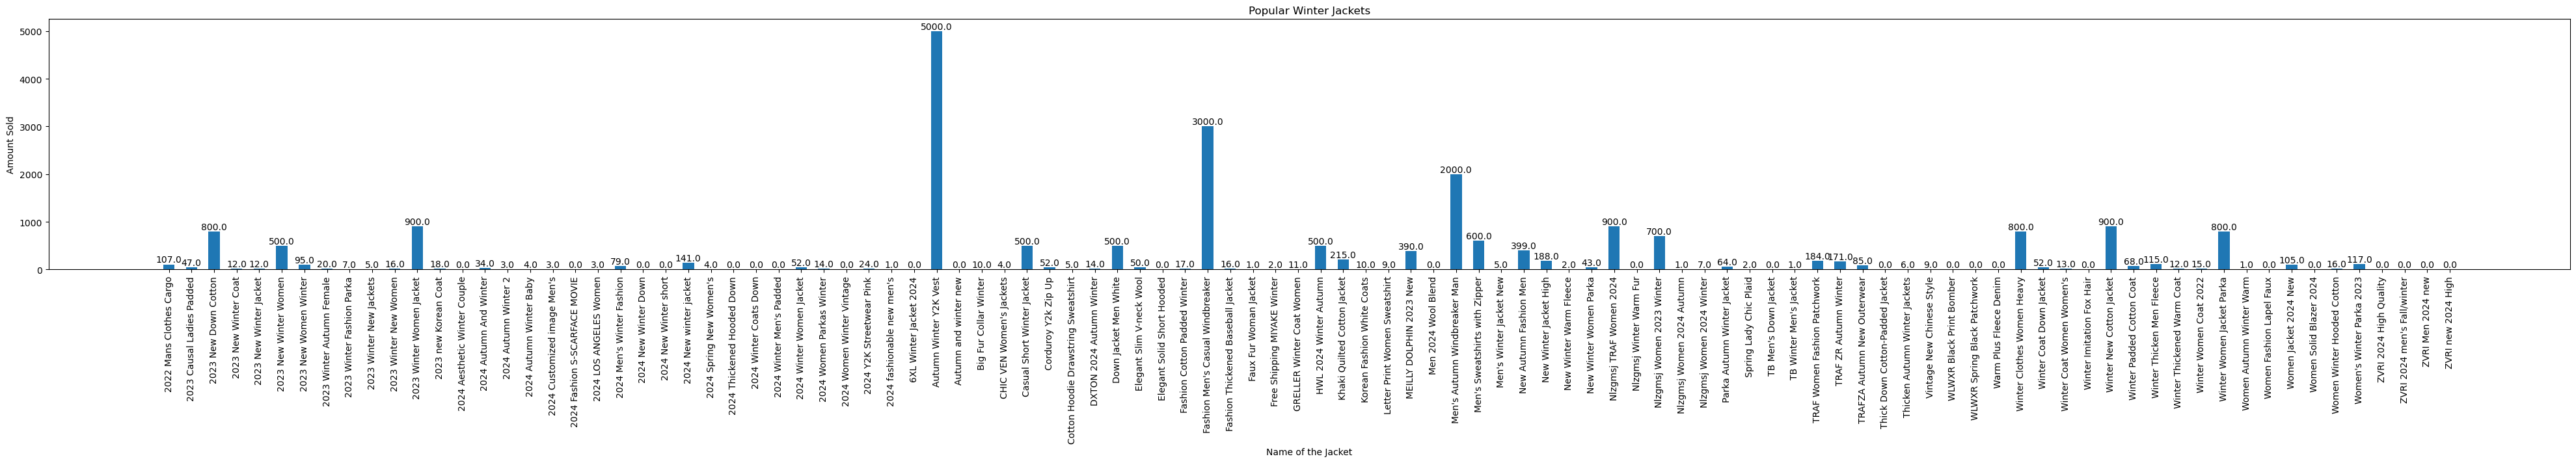

In [77]:
#Plotting the plot for the same as we can see in the plot that we previously made that the name tag was overlappinhg on each other so we need to resolve tghat:

median_trade_amount = df.groupby('new_title')['tradeAmount'].median()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(50, 5)

plt.bar(median_trade_amount.index, median_trade_amount, width = 0.5)
plt.title('Popular Winter Jackets')
plt.xlabel('Name of the Jacket')
plt.ylabel('Amount Sold')
plt.xticks(median_trade_amount.index, median_trade_amount.index, rotation=90)
#plt.figure(figsize = (8, 4))

for i, v in enumerate(median_trade_amount):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

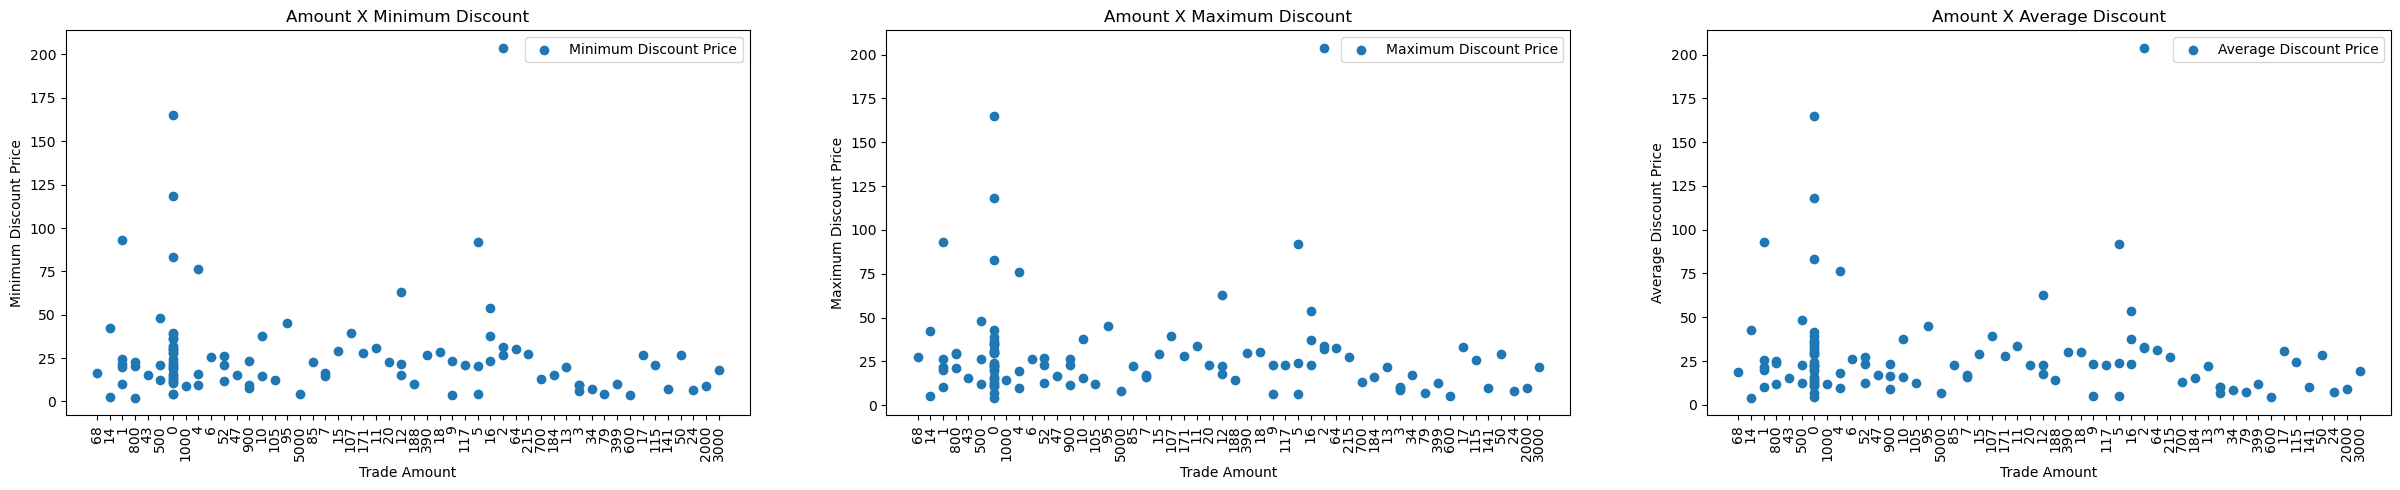

In [78]:
plt.figure(figsize = (30, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['tradeAmount'], df['MinDiscountPrice'], label = 'Minimum Discount Price')
plt.title('Amount X Minimum Discount')
plt.xlabel('Trade Amount')
plt.ylabel('Minimum Discount Price')
plt.xticks(rotation = 90)
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(df['tradeAmount'], df['MaxDiscountPrice'], label = 'Maximum Discount Price')
plt.title('Amount X Maximum Discount')
plt.xlabel('Trade Amount')
plt.ylabel('Maximum Discount Price')
plt.xticks(rotation = 90)
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(df['tradeAmount'], df['AverageDiscountPrice'], label = 'Average Discount Price')
plt.title('Amount X Average Discount')
plt.xlabel('Trade Amount')
plt.ylabel('Average Discount Price')
plt.xticks(rotation = 90)
plt.legend()

plt.show()


In [79]:
#Correlation between features 
corr = df[['MinDiscountPrice', 'MaxDiscountPrice', 'AverageDiscountPrice', 'tradeAmount']].corr()
corr

,MinDiscountPrice,MaxDiscountPrice,AverageDiscountPrice,tradeAmount
MinDiscountPrice,1.000000,0.994417,0.998618,-0.159798
MaxDiscountPrice,0.994417,1.000000,0.997784,-0.137552
AverageDiscountPrice,0.998618,0.997784,1.000000,-0.151753
tradeAmount,-0.159798,-0.137552,-0.151753,1.000000


In [80]:
print(df.dtypes)

title                    object
tradeAmount              object
averageStar             float64
wishedCount               int64
quantity                  int64
AverageDiscountPrice    float64
MinDiscountPrice        float64
MaxDiscountPrice        float64
new_title                object
dtype: object


In [81]:
df.isnull().sum()

title                   0
tradeAmount             0
averageStar             0
wishedCount             0
quantity                0
AverageDiscountPrice    0
MinDiscountPrice        0
MaxDiscountPrice        0
new_title               0
dtype: int64

In [82]:
df

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice,new_title
0,Winter Padded Cotton Coat Female New Korean Ve...,68,0.0,309,17726,18.412000,16.31,27.34,Winter Padded Cotton Coat
1,2024 Women Parkas Winter Casual Long Coats Jac...,14,5.0,46,23969,42.540000,42.54,42.54,2024 Women Parkas Winter
2,Faux Fur Woman Jacket Hooded Drawstring Parka ...,1,0.0,3,599,25.445667,24.28,26.62,Faux Fur Woman Jacket
3,2023 New Down Cotton Vest Women Autumn Winter ...,800,4.5,1585,485033,11.981977,2.06,21.36,2023 New Down Cotton
4,New Winter Women Parka Hooded Jackets Thicken ...,43,0.0,112,32651,15.250000,15.25,15.25,New Winter Women Parka
...,...,...,...,...,...,...,...,...,...
104,Free Shipping MIYAKE Winter new down jacket wo...,2,0.0,7,1499,203.900000,203.90,203.90,Free Shipping MIYAKE Winter
105,2024 Y2K Streetwear Pink Hoodie Sweatshirt Fun...,24,5.0,72,343,7.229000,6.62,7.89,2024 Y2K Streetwear Pink
106,Men's Autumn Windbreaker Man Oversize Windshie...,2000,4.7,2797,67583,9.200286,8.72,9.57,Men's Autumn Windbreaker Man
107,Men 2024 Wool Blend Coat Autumn Winter Solid ...,0,0.0,0,12,41.286667,39.49,42.77,Men 2024 Wool Blend


In [83]:

df.shape


(104, 9)

In [84]:
df.isnull().sum()

title                   0
tradeAmount             0
averageStar             0
wishedCount             0
quantity                0
AverageDiscountPrice    0
MinDiscountPrice        0
MaxDiscountPrice        0
new_title               0
dtype: int64

In [85]:
df[['averageStar', 'wishedCount']].describe()

,averageStar,wishedCount
count,104.000000,104.000000
mean,2.327885,669.903846
std,2.293658,1584.430770
min,0.000000,0.000000
25%,0.000000,2.750000
50%,2.500000,31.000000
75%,4.625000,425.500000
max,5.000000,9886.000000


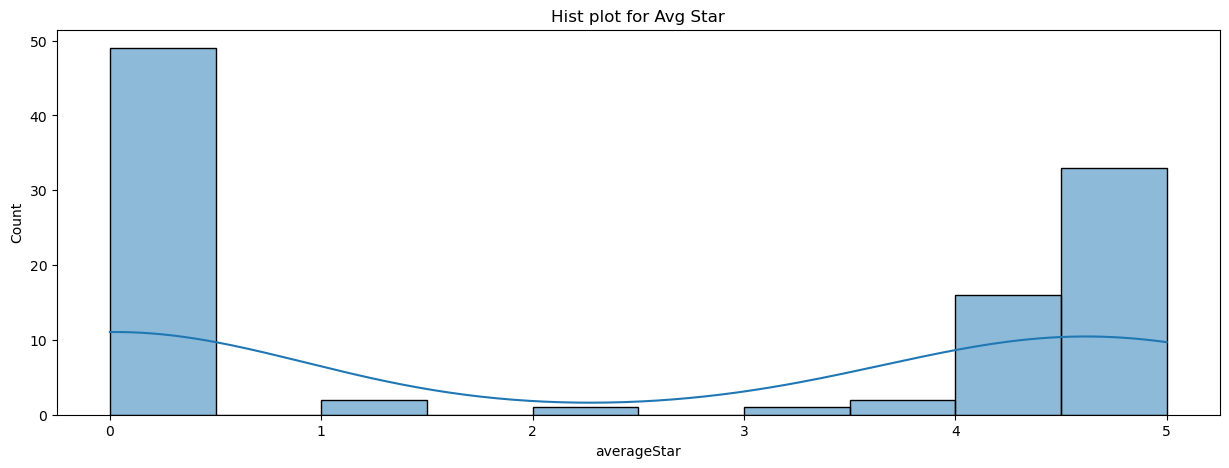

In [86]:
plt.figure(figsize = (15, 5))
sns.histplot(data = df, x = 'averageStar', bins = 10, kde = True)
plt.title('Hist plot for Avg Star')
plt.show()

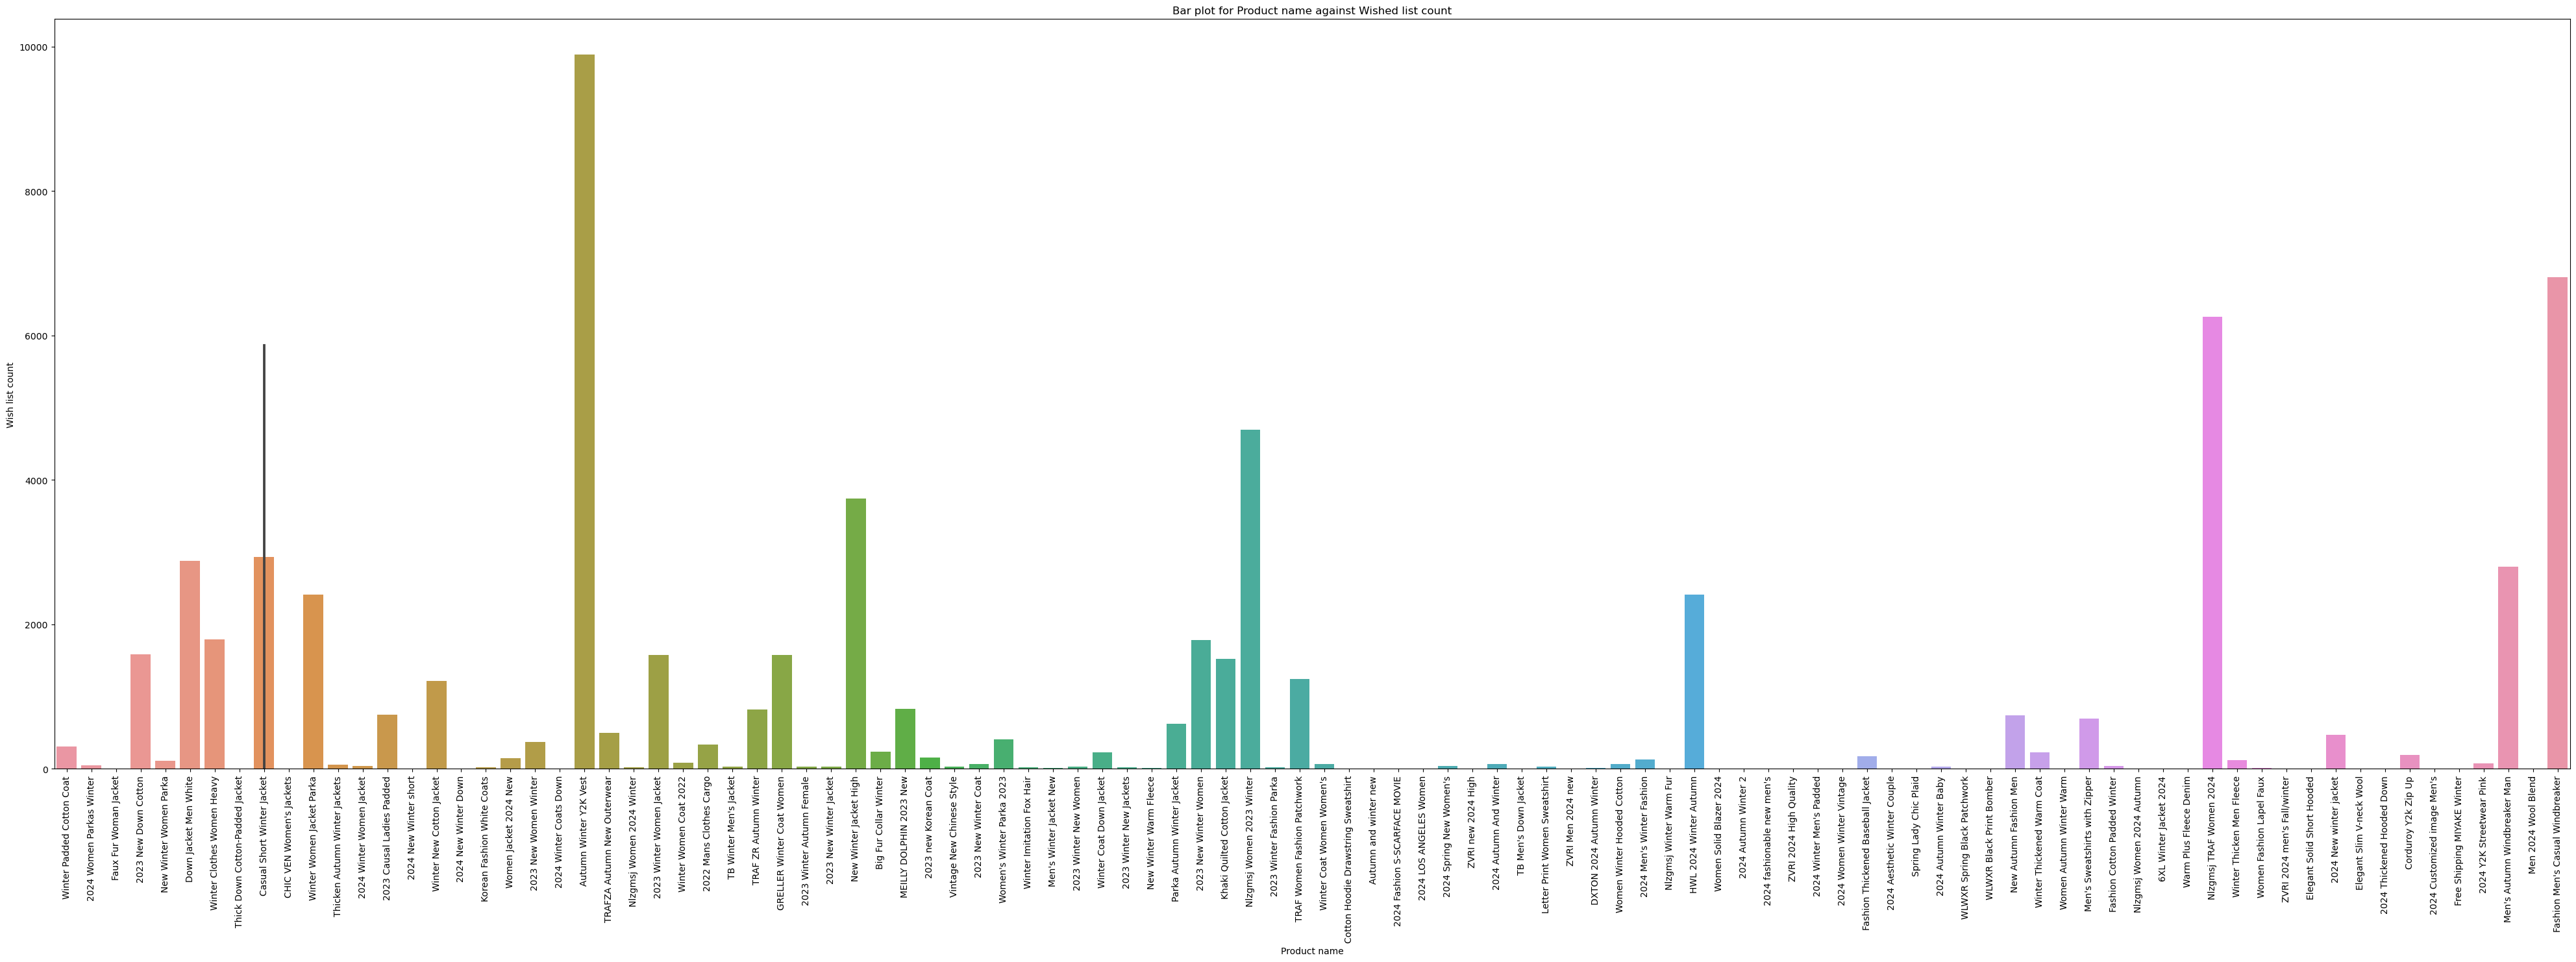

In [87]:
plt.figure(figsize = (50, 15))
sns.barplot(data = df, x = 'new_title', y = 'wishedCount')
plt.title('Bar plot for Product name against Wished list count')
plt.xlabel('Product name')
plt.ylabel('Wish list count')
plt.xticks(rotation = 90)
plt.show()

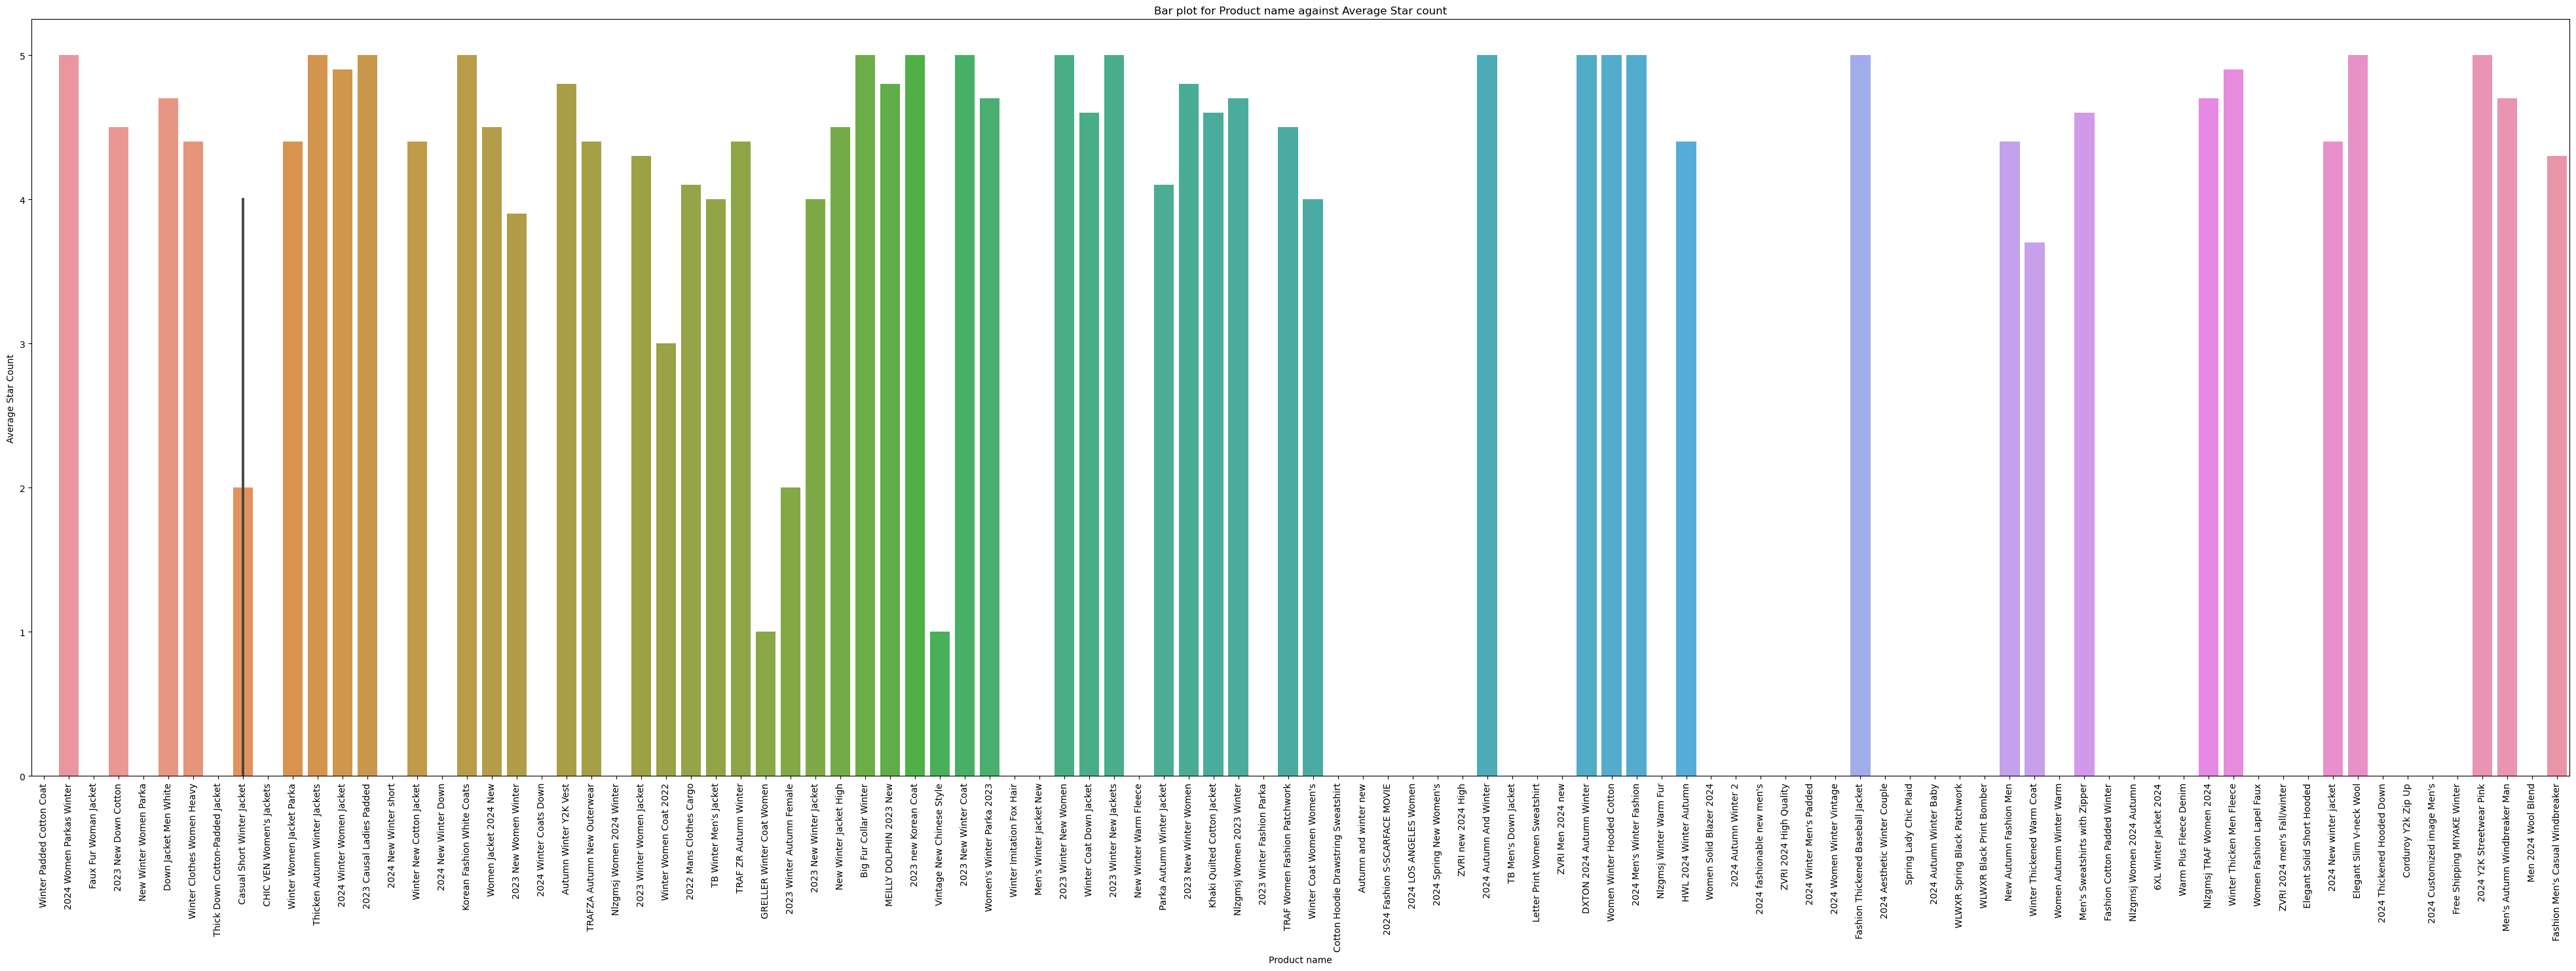

In [88]:
plt.figure(figsize = (50, 15))
sns.barplot(data = df, x = 'new_title', y = 'averageStar')
plt.title('Bar plot for Product name against Average Star count')
plt.xlabel('Product name')
plt.ylabel('Average Star Count')
plt.xticks(rotation = 90)
plt.show()

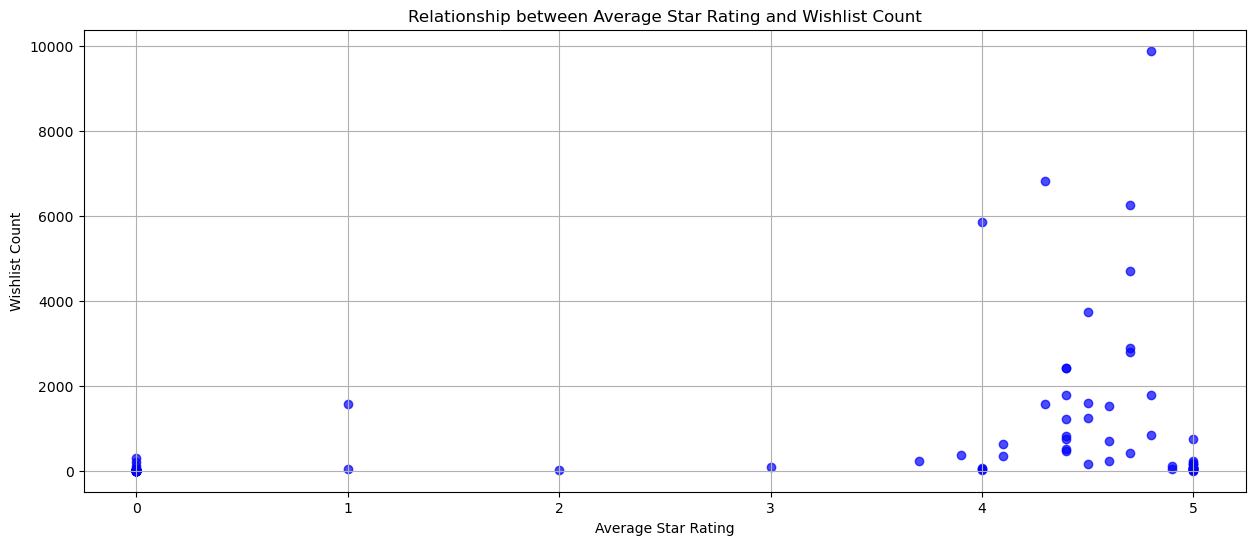

"\nplt.scatter(data['averageStar'], data['wishedCount'])\nplt.xlabel('Avgearge Star Rating')\nplt.ylabel('Wish List Count')\nplt.title('Relationship between Avgerage Star Rating and Wish List Count')\nplt.show()\n"

In [89]:
plt.figure(figsize=(15, 6))
plt.scatter(df["averageStar"], df["wishedCount"], color='blue', alpha=0.7)
plt.xlabel("Average Star Rating")
plt.ylabel("Wishlist Count")
plt.title("Relationship between Average Star Rating and Wishlist Count")
plt.grid(True)
plt.show()

"""
plt.scatter(data['averageStar'], data['wishedCount'])
plt.xlabel('Avgearge Star Rating')
plt.ylabel('Wish List Count')
plt.title('Relationship between Avgerage Star Rating and Wish List Count')
plt.show()
"""

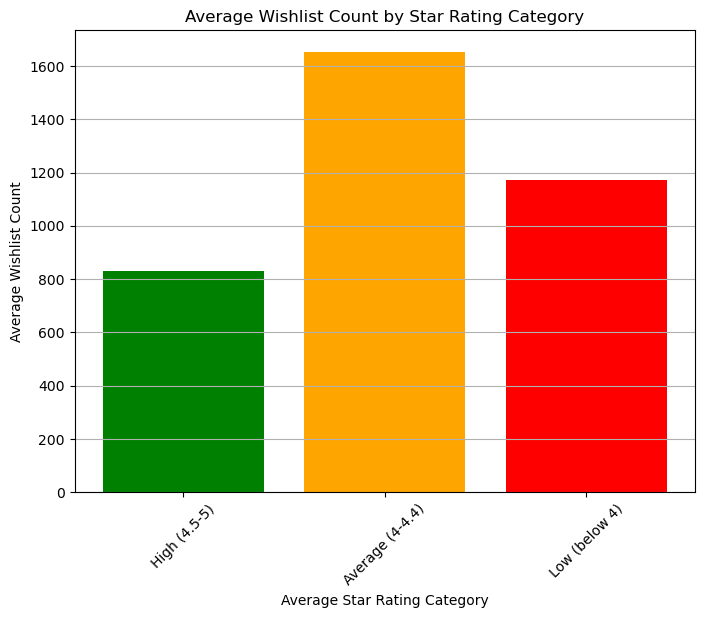

In [90]:
star_rating_categories = ["High (4.5-5)", "Average (4-4.4)", "Low (below 4)"]
df_grouped = df.groupby(pd.cut(df["averageStar"], bins=[0, 4, 4.5, 5]))["wishedCount"].mean()
plt.figure(figsize=(8, 6))
plt.bar(star_rating_categories, df_grouped, color=['green', 'orange', 'red'])
plt.xlabel("Average Star Rating Category")
plt.ylabel("Average Wishlist Count")
plt.title("Average Wishlist Count by Star Rating Category")
plt.xticks(rotation=45)  #90 for vertical
plt.grid(axis='y')
plt.show()

In [91]:
correlation = df[["averageStar", "wishedCount"]].corr()
print("Correlation coefficient between Average Star Rating and Wishlist Count:", correlation)

Correlation coefficient between Average Star Rating and Wishlist Count:              averageStar  wishedCount
averageStar      1.00000      0.38278
wishedCount      0.38278      1.00000


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df['averageStar'].values.reshape(-1, 1)
y = df['wishedCount']

if X.shape[0] == y.shape[0]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    avg_star_rating = 4.5
    predicted_wish_list_count = model.predict([[avg_star_rating]])
    print(f'Predicted wish list count for a product with average star rating {avg_star_rating}: {predicted_wish_list_count[0]}')
else:
    print("Error: Number of samples in X and y are inconsistent.")

Predicted wish list count for a product with average star rating 4.5: 1327.7446798399512


In [93]:
quantity_stats = df['quantity'].describe()
quantity_stats

count       104.000000
mean      20120.721154
std       64656.235589
min           6.000000
25%         382.750000
50%        2694.000000
75%       15825.750000
max      485033.000000
Name: quantity, dtype: float64

In [94]:
total_quantity_available = df['quantity'].sum()
print("Total availabe Quantity:", total_quantity_available)

Total availabe Quantity: 2092555


In [95]:
lowest_quantity = df.nsmallest(5, 'quantity')
lowest_quantity

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice,new_title
9,CHIC VEN Women's Jackets Vintage Fashion Lapel...,4,0.0,7,6,76.210000,76.21,76.21,CHIC VEN Women's Jackets
27,2022 Mans Clothes Cargo Jackets Men Winter New...,107,4.1,338,6,39.330000,39.33,39.33,2022 Mans Clothes Cargo
101,2024 Thickened Hooded Down Jacket Women Winter...,0,0.0,5,9,13.460000,13.46,13.46,2024 Thickened Hooded Down
80,WLWXR Spring Black Patchwork Bomber Jackets Cl...,0,0.0,0,10,12.210000,12.21,12.21,WLWXR Spring Black Patchwork
107,Men 2024 Wool Blend Coat Autumn Winter Solid ...,0,0.0,0,12,41.286667,39.49,42.77,Men 2024 Wool Blend


In [96]:
highest_quantity = df.nlargest(5, 'quantity')
highest_quantity

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice,new_title
3,2023 New Down Cotton Vest Women Autumn Winter ...,800,4.5,1585,485033,11.981977,2.06,21.36,2023 New Down Cotton
25,2023 Winter Women Jacket Coats Long Parkas Fem...,900,4.3,1573,389680,16.131899,9.51,26.22,2023 Winter Women Jacket
33,New Winter Jacket High Quality stand-callor Co...,188,4.5,3743,209195,14.218750,10.00,14.50,New Winter Jacket High
72,2024 Winter Men's Padded Jacket Middle-aged An...,0,0.0,0,80919,6.755802,4.02,6.79,2024 Winter Men's Padded
65,2024 Men's Winter Fashion Trend Jacket Motorcy...,79,5.0,127,80838,7.054938,4.25,7.09,2024 Men's Winter Fashion


In [97]:
df['tradeAmount'] = pd.to_numeric(df['tradeAmount'], errors='coerce').astype('Int64')

In [98]:
lowest_trade =df.nsmallest(5, 'tradeAmount')
lowest_trade

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice,new_title
7,Thick Down Cotton-Padded Jacket Jackets Women ...,0,0.0,3,9000,19.210000,19.210000,19.210000,Thick Down Cotton-Padded Jacket
14,2024 New Winter short Down Cotton Jacket Women...,0,0.0,2,2048,24.270000,24.270000,24.270000,2024 New Winter short
16,2024 New Winter Down Cotton Women Short Parkas...,0,0.0,3,5000,22.920000,21.000000,23.000000,2024 New Winter Down
20,2024 Winter Coats Down Cotton Padded Jacket Wo...,0,0.0,3,7500,20.486667,18.580000,20.780000,2024 Winter Coats Down
22,Casual Short Winter Jacket Women Stand Collar ...,0,0.0,2,15984,28.701923,27.610093,29.511589,Casual Short Winter Jacket


In [99]:
highest_trade = df.nlargest(5, 'tradeAmount')
highest_trade

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice,new_title
21,Autumn Winter Y2K Vest Women Thick Warm Down V...,5000,4.8,9886,4513,6.578889,4.31,7.89,Autumn Winter Y2K Vest
108,Fashion Men's Casual Windbreaker Jackets Hoode...,3000,4.3,6809,419,19.238750,18.18,21.62,Fashion Men's Casual Windbreaker
106,Men's Autumn Windbreaker Man Oversize Windshie...,2000,4.7,2797,67583,9.200286,8.72,9.57,Men's Autumn Windbreaker Man
8,Casual Short Winter Jacket Women Stand Collar ...,1000,4.0,5863,32890,11.669500,8.61,14.32,Casual Short Winter Jacket
15,Winter New Cotton Jacket Men's Baseball Collar...,900,4.4,1214,1335,9.055833,7.73,11.58,Winter New Cotton Jacket


In [100]:
low_quantity_products = df[df['quantity'] < 20]
low_quantity_products

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice,new_title
9,CHIC VEN Women's Jackets Vintage Fashion Lapel...,4,0.0,7,6,76.210000,76.21,76.21,CHIC VEN Women's Jackets
27,2022 Mans Clothes Cargo Jackets Men Winter New...,107,4.1,338,6,39.330000,39.33,39.33,2022 Mans Clothes Cargo
80,WLWXR Spring Black Patchwork Bomber Jackets Cl...,0,0.0,0,10,12.210000,12.21,12.21,WLWXR Spring Black Patchwork
101,2024 Thickened Hooded Down Jacket Women Winter...,0,0.0,5,9,13.460000,13.46,13.46,2024 Thickened Hooded Down
107,Men 2024 Wool Blend Coat Autumn Winter Solid ...,0,0.0,0,12,41.286667,39.49,42.77,Men 2024 Wool Blend


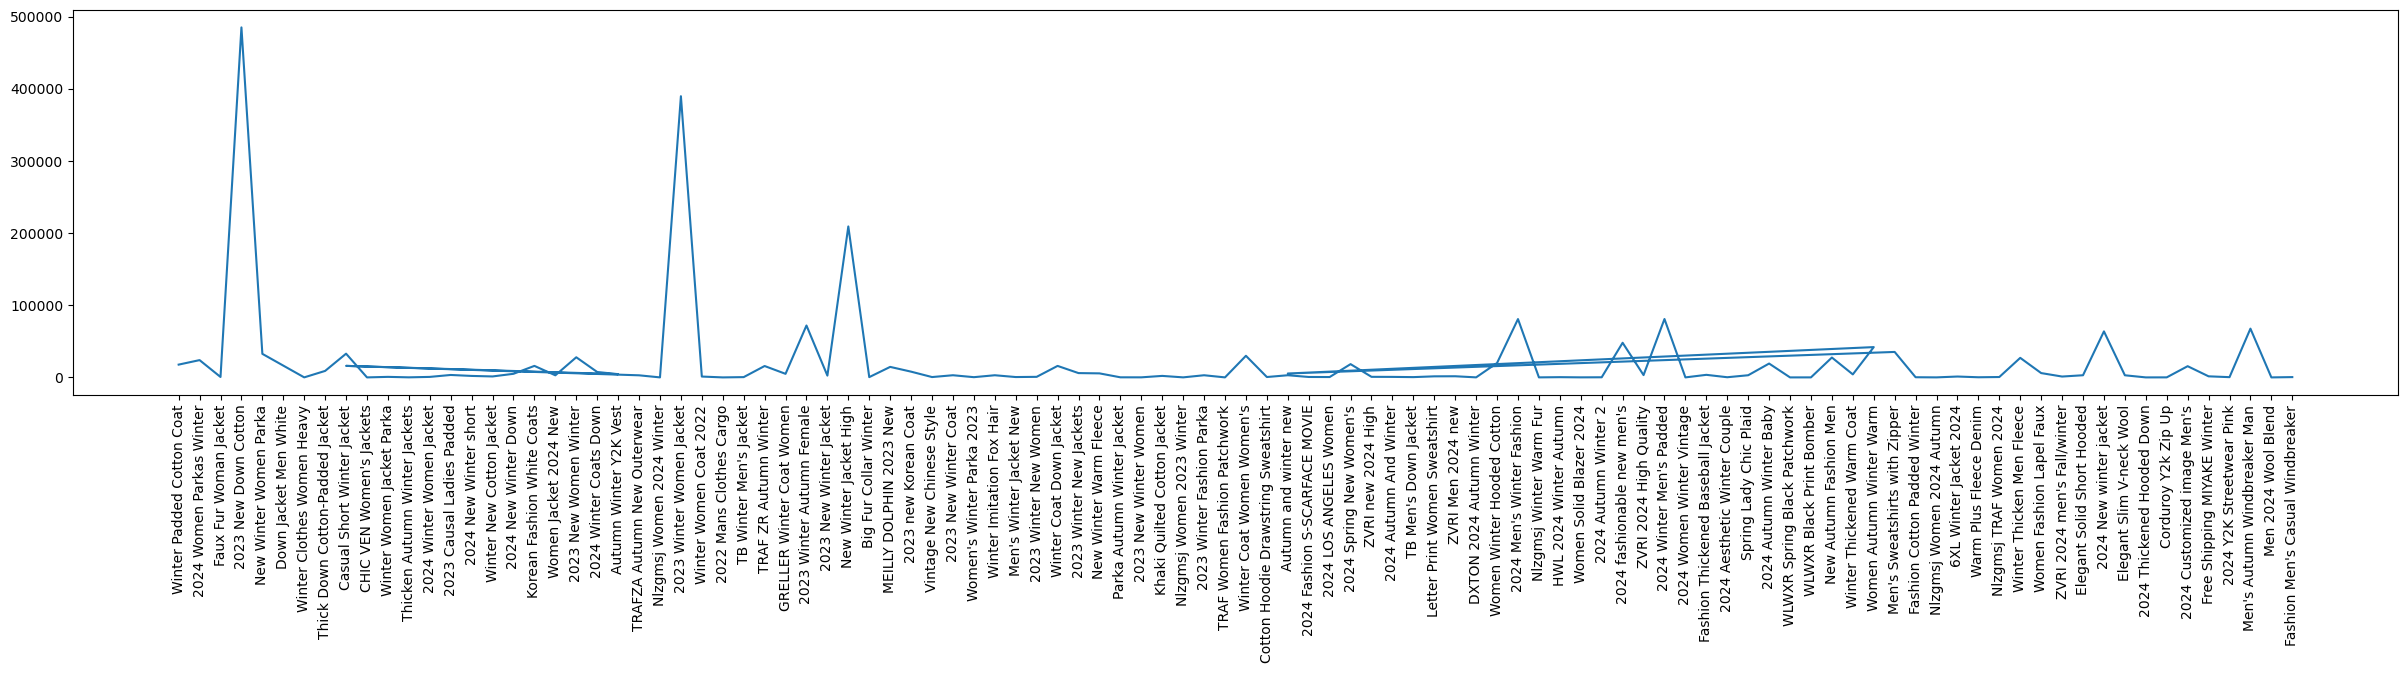

In [101]:
plt.figure(figsize = (30, 5))
plt.plot(df['new_title'], df['quantity'])
plt.xticks(rotation = 90)
plt.show()

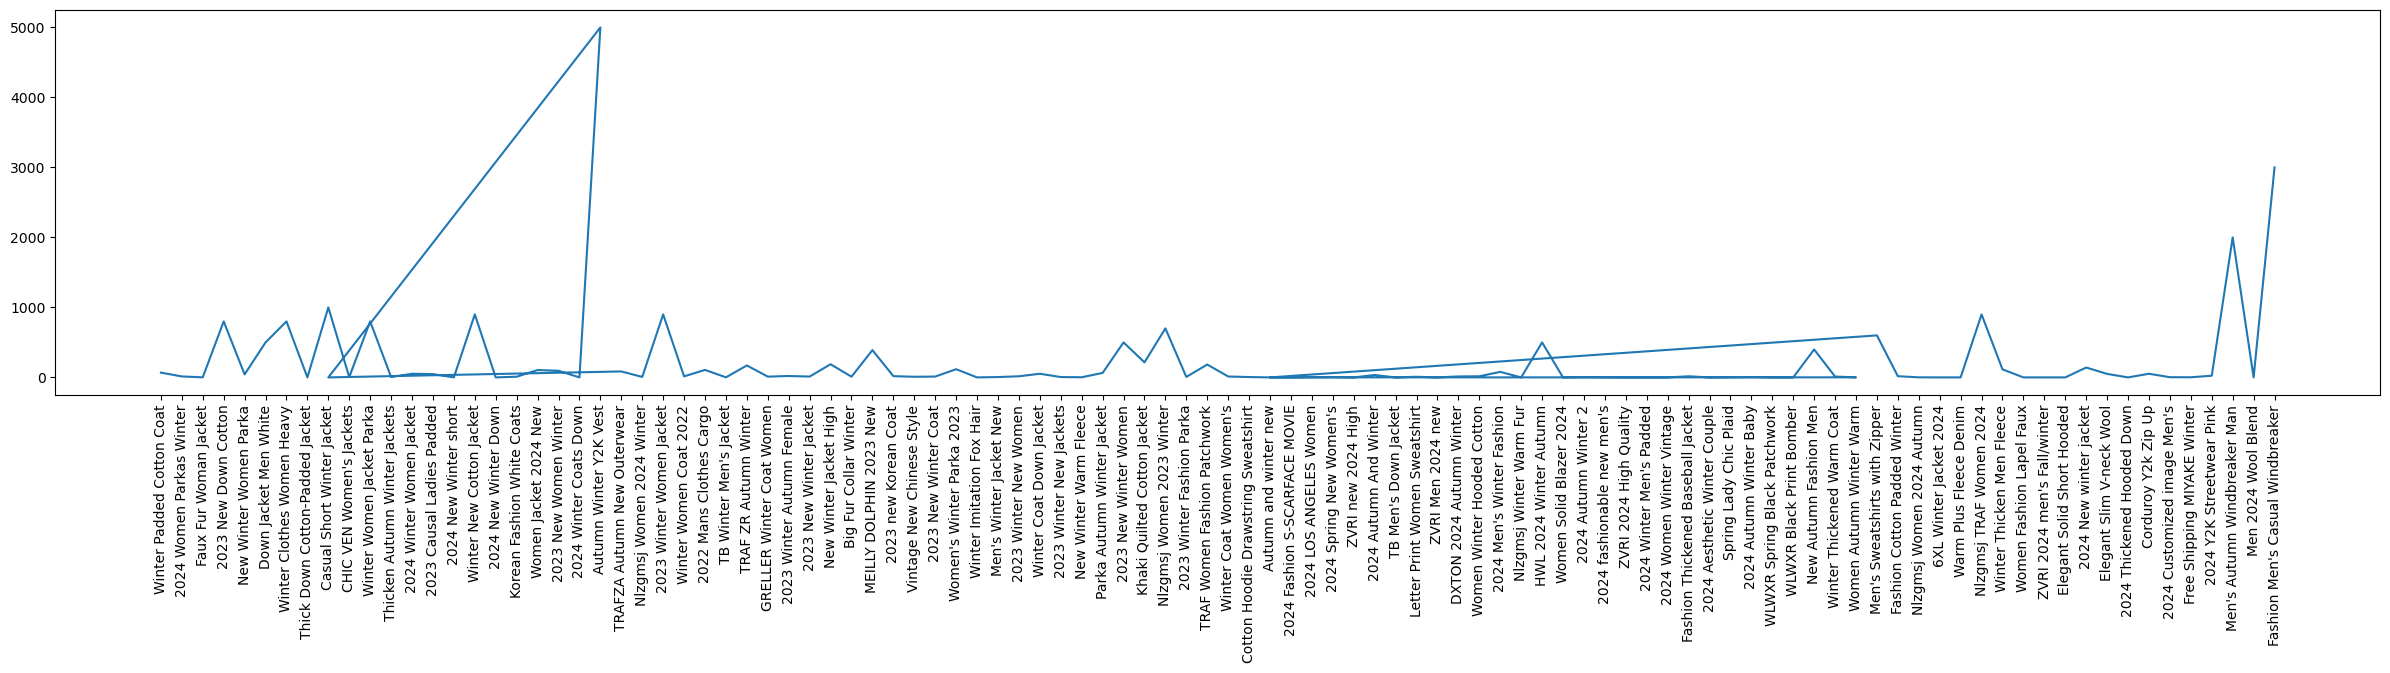

In [102]:
plt.figure(figsize = (30, 5))
plt.plot(df['new_title'], df['tradeAmount'])
plt.xticks(rotation = 90)
plt.show()

In [103]:
#total quantity of each product 
total_quantity = df.groupby('new_title')['quantity'].sum()
#total trade amount of each product
total_trade_amount = df.groupby('new_title')['tradeAmount'].sum()
#remaining quantity 
remaining_quantity = total_quantity - total_trade_amount
inventory_data = pd.DataFrame({'new_title' : total_quantity.index,
                               'total_quantity' : total_quantity.values,
                               'total_trade_amount' : total_trade_amount.values,
                               'remaining_quantity' : remaining_quantity.values})
inventory_data = inventory_data.sort_values(by = 'remaining_quantity', ascending = False)
inventory_data 

,new_title,total_quantity,total_trade_amount,remaining_quantity
2,2023 New Down Cotton,485033,800,484233
11,2023 Winter Women Jacket,389680,900,388780
61,New Winter Jacket High,209195,188,209007
27,2024 Winter Men's Padded,80919,0,80919
20,2024 Men's Winter Fashion,80838,79,80759
...,...,...,...,...
5,2023 New Winter Women,97,500,-403
34,Autumn Winter Y2K Vest,4513,5000,-487
66,Nlzgmsj Women 2023 Winter,65,700,-635
82,Winter Clothes Women Heavy,48,800,-752


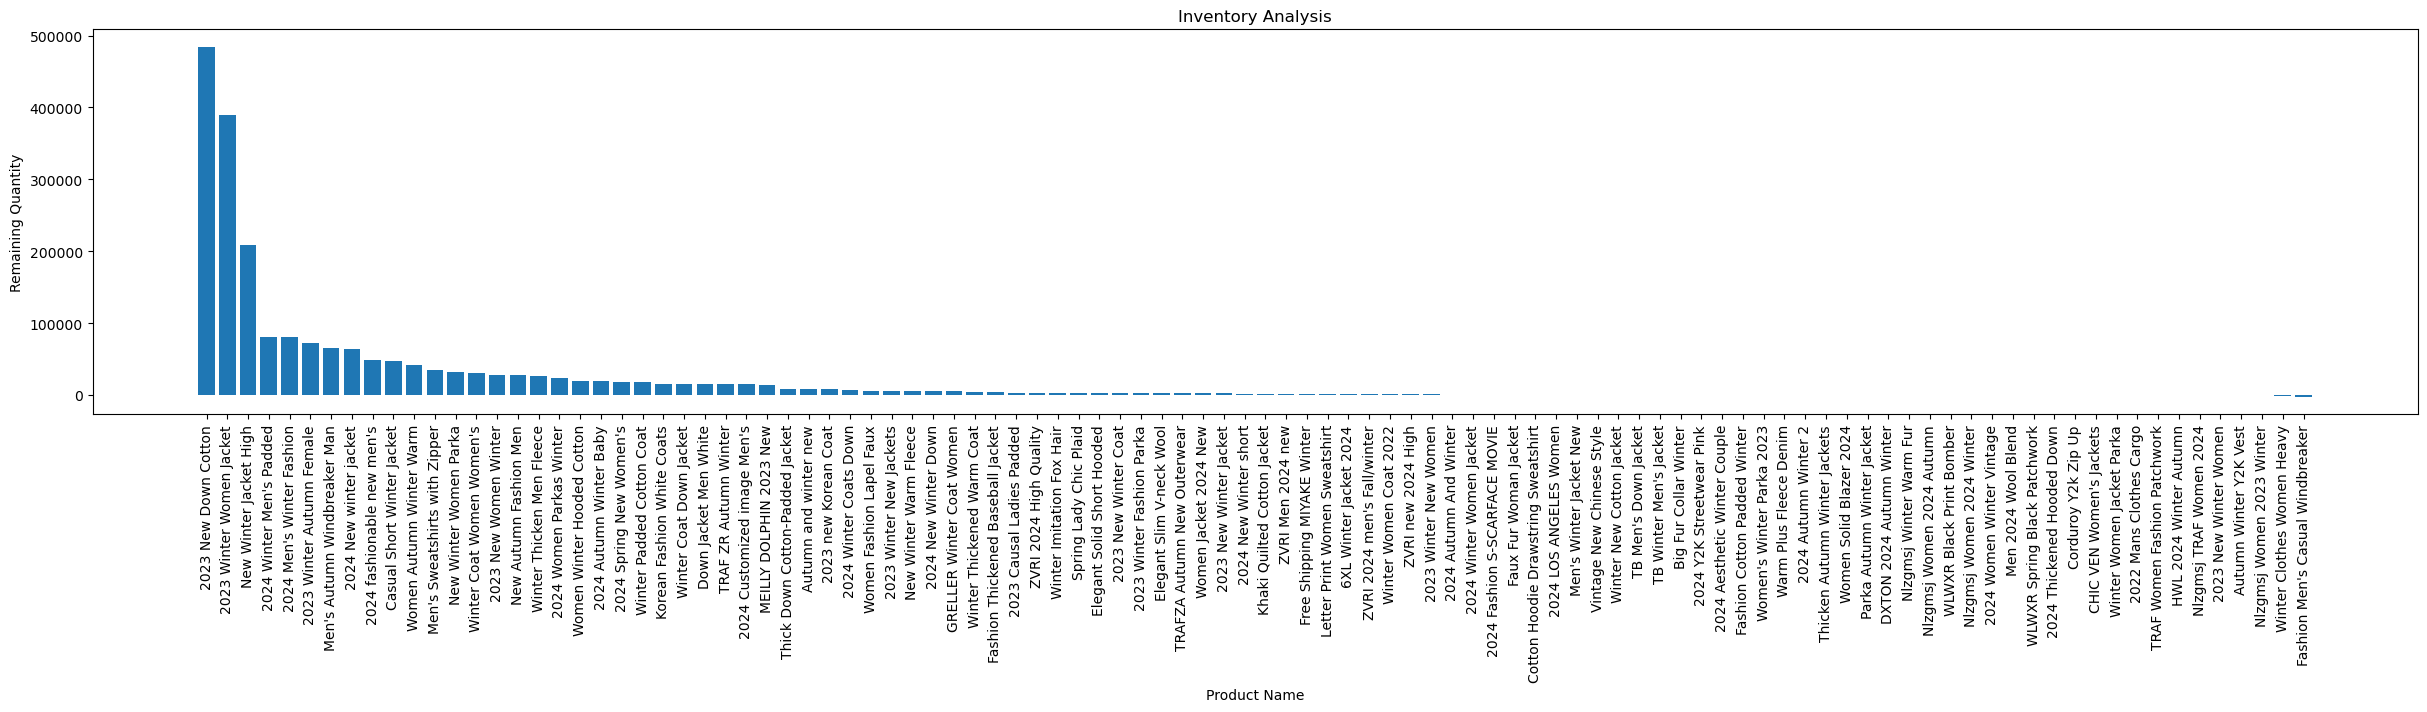

In [104]:
plt.figure(figsize=(30, 5))
plt.bar(inventory_data['new_title'], inventory_data['remaining_quantity'])
plt.xlabel('Product Name')
plt.ylabel('Remaining Quantity')
plt.title('Inventory Analysis')
plt.xticks(rotation = 90)
plt.show()

In [105]:
df

,title,tradeAmount,averageStar,wishedCount,quantity,AverageDiscountPrice,MinDiscountPrice,MaxDiscountPrice,new_title
0,Winter Padded Cotton Coat Female New Korean Ve...,68,0.0,309,17726,18.412000,16.31,27.34,Winter Padded Cotton Coat
1,2024 Women Parkas Winter Casual Long Coats Jac...,14,5.0,46,23969,42.540000,42.54,42.54,2024 Women Parkas Winter
2,Faux Fur Woman Jacket Hooded Drawstring Parka ...,1,0.0,3,599,25.445667,24.28,26.62,Faux Fur Woman Jacket
3,2023 New Down Cotton Vest Women Autumn Winter ...,800,4.5,1585,485033,11.981977,2.06,21.36,2023 New Down Cotton
4,New Winter Women Parka Hooded Jackets Thicken ...,43,0.0,112,32651,15.250000,15.25,15.25,New Winter Women Parka
...,...,...,...,...,...,...,...,...,...
104,Free Shipping MIYAKE Winter new down jacket wo...,2,0.0,7,1499,203.900000,203.90,203.90,Free Shipping MIYAKE Winter
105,2024 Y2K Streetwear Pink Hoodie Sweatshirt Fun...,24,5.0,72,343,7.229000,6.62,7.89,2024 Y2K Streetwear Pink
106,Men's Autumn Windbreaker Man Oversize Windshie...,2000,4.7,2797,67583,9.200286,8.72,9.57,Men's Autumn Windbreaker Man
107,Men 2024 Wool Blend Coat Autumn Winter Solid ...,0,0.0,0,12,41.286667,39.49,42.77,Men 2024 Wool Blend
